In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
warnings.simplefilter(action= 'ignore')

In [51]:
df = pd.read_excel(r'/Users/sot/Downloads/default of credit card clients.xls' ,header= 1)
pd.set_option('display.max_columns', None)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [52]:
# column names normalization

df.columns = df.columns.str.lower().str.replace(' ', '_')

In [53]:
df

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [54]:

# Placing the target column  as the first column in the dataset

last_column = df.columns[-1]
df = df[[last_column] + list(df.columns[:-1])]

In [55]:

# Renaming repayment columns based on month for my personal understanding


df.rename(columns={'pay_0': 'sept_repayment', 'pay_2': 'aug_repayment','pay_3': 
                   'july_repayment', 'pay_4': 'june_repayment','pay_5': 'may_repayment',
                   'pay_6': 'april_repayment'}, inplace=True)


In [56]:
# Renaming monthly bill columns based on month

df.rename(columns={'bill_amt1': 'sept_billAmt', 'bill_amt2': 'aug_billAmt','bill_amt3': 
                   'july_billAmt', 'bill_amt4': 'june_billAmt','bill_amt5': 'may_billAmt',
                   'bill_amt6': 'april_billAmt'}, inplace=True)

In [57]:
# Renaming monthly payment columns based on month

df.rename(columns={'pay_amt1': 'sept_AmtPaid', 'pay_amt2': 'aug_AmtPaid','pay_amt3': 
                   'july_AmtPaid', 'pay_amt4': 'june_AmtPaid','pay_amt5': 'may_AmtPaid',
                   'pay_amt6': 'april_AmtPaid'}, inplace=True)

In [58]:
df

,default_payment_next_month,id,limit_bal,sex,education,marriage,age,sept_repayment,aug_repayment,july_repayment,june_repayment,may_repayment,april_repayment,sept_billAmt,aug_billAmt,july_billAmt,june_billAmt,may_billAmt,april_billAmt,sept_AmtPaid,aug_AmtPaid,july_AmtPaid,june_AmtPaid,may_AmtPaid,april_AmtPaid
0,1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,0,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,0,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,1,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,1,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


# WEEK 1: Exploratory Data Analysis and Data Preprocessing

### Section 1: EDA

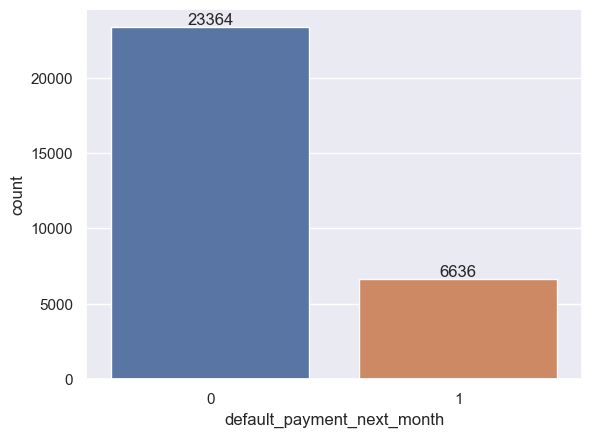

In [59]:


# Create the count plot
target_check = sns.countplot(data=df, x='default_payment_next_month')

# Adding  data labels to have idea of the distribution
for p in target_check.patches:
    target_check.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )

    
## note that DEFAULT = 1 and NO DEFAULT = 0

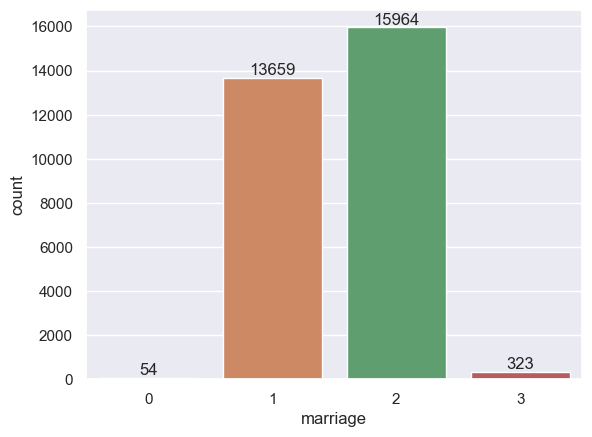

In [60]:
marriage_check = sns.countplot(data = df,x = 'marriage')

# Adding  data labels to have idea of the distribution
for p in marriage_check.patches:
    marriage_check.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )
    
    
 # note that married = 1, single = 2, others (divorced, widowed) = 3   

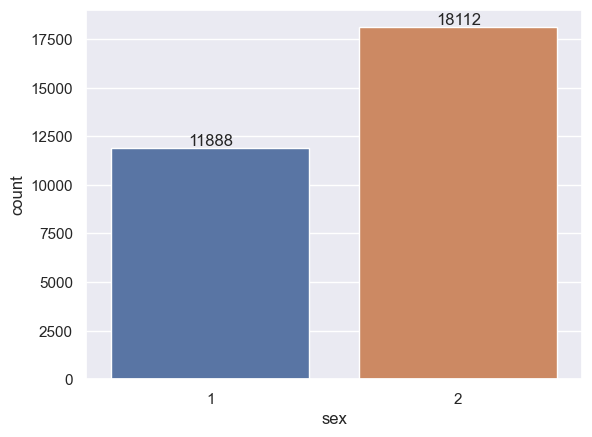

In [61]:
gender_check = sns.countplot(data = df,x = 'sex')

# Adding  data labels to have idea of the distribution
for p in gender_check.patches:
    gender_check.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )
    
# note that MALE = 1 and FEMALE = 2

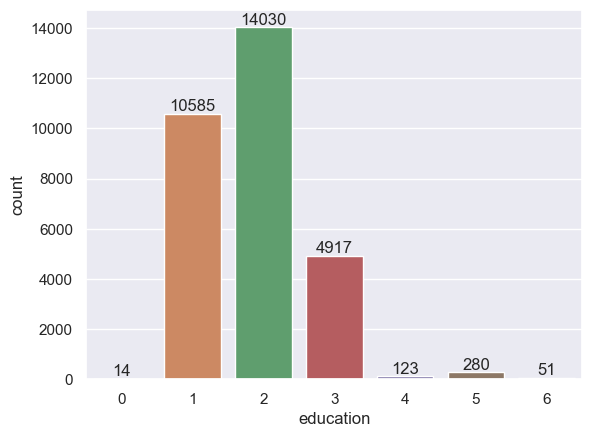

In [62]:
education_check = sns.countplot(data = df,x = 'education')

# Adding  data labels to have idea of the distribution
for p in education_check.patches:
    education_check.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )
    
    
# note that 1 = Graduate school (master’s degree or PhD), university = 2, high school = 3 and other level = 4   

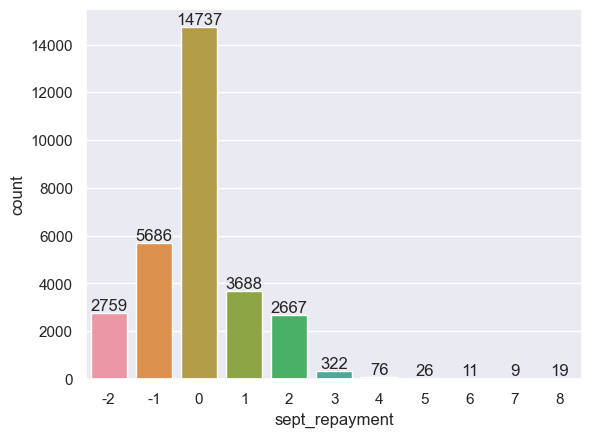

In [63]:
# Create the count plot
repayment_check = sns.countplot(data=df, x='sept_repayment')

# Adding  data labels to have idea of the distribution
for p in repayment_check.patches:
    repayment_check.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )
    
# note that pay duly = -1; payment delay for one month = 1;payment delay for two months = 2; 
# payment delay for 3 months and above = 3

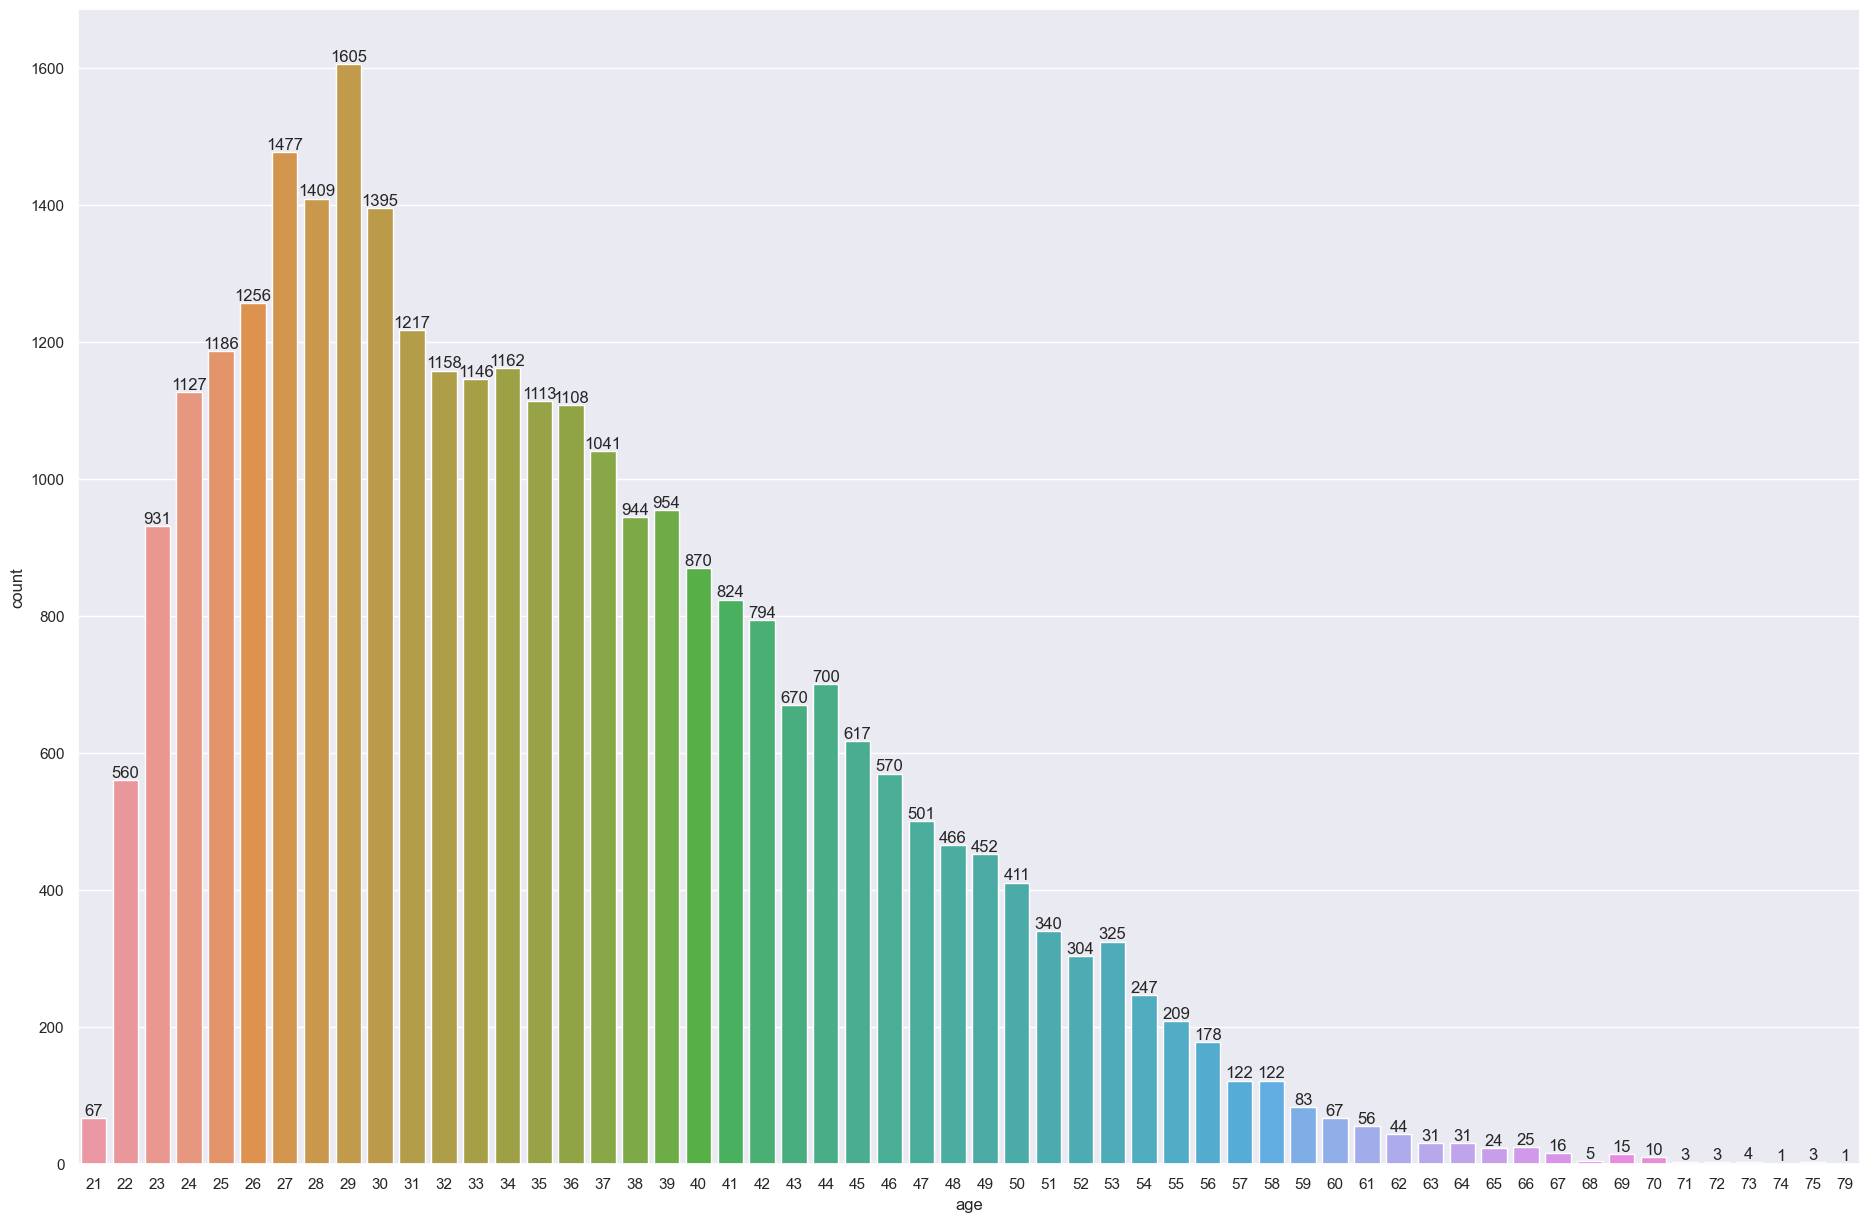

In [64]:

plt.figure(figsize=(23,15))
age_check = sns.countplot(data = df,x = 'age')

# Adding  data labels to have idea of the distribution
for p in age_check.patches:
    age_check.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )

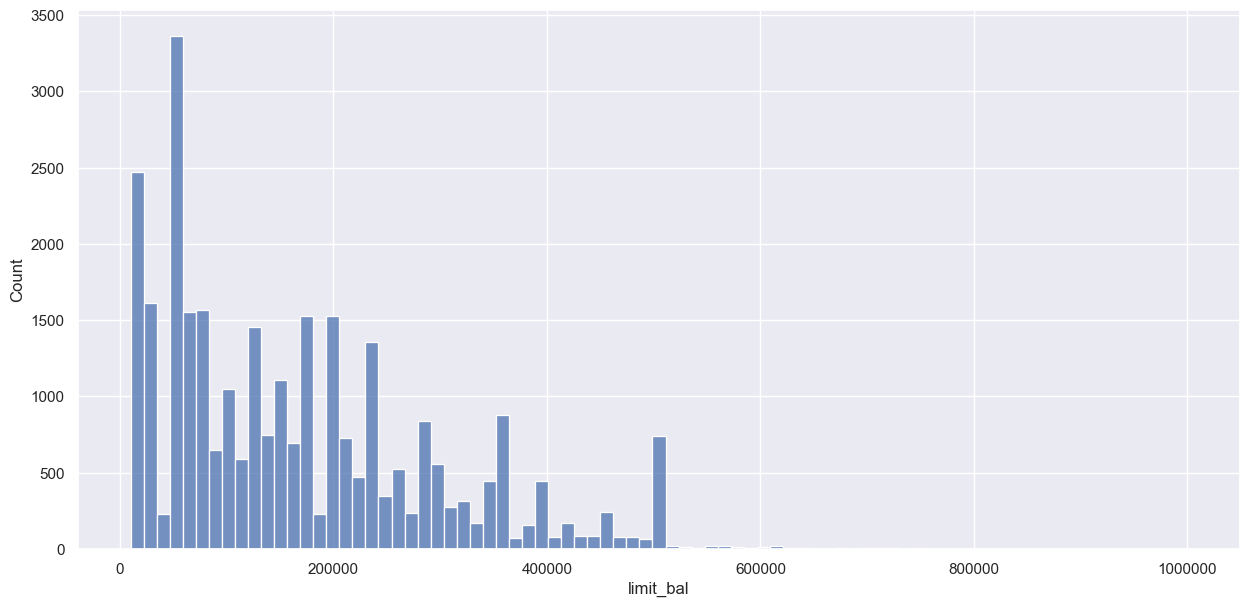

In [65]:
plt.figure(figsize=(15, 7))
sns.histplot(df['limit_bal'])
plt.ticklabel_format(style='plain', axis='x')

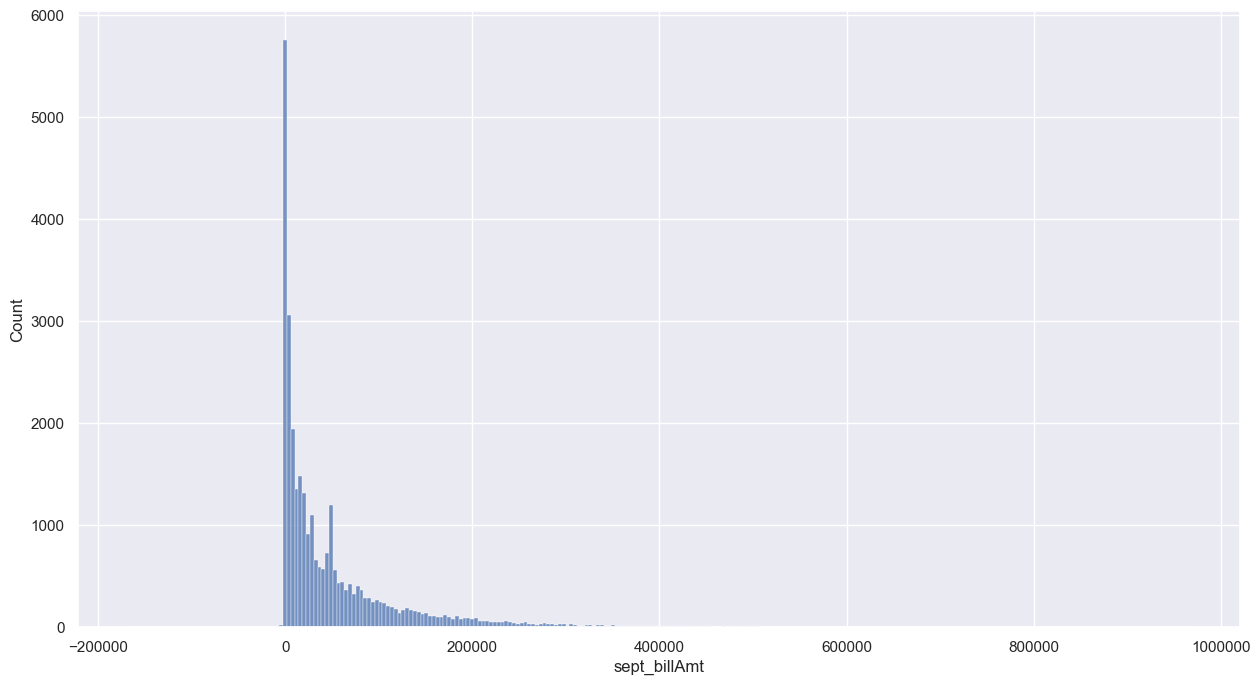

In [66]:
plt.figure(figsize=(15, 8))
sns.histplot(df['sept_billAmt'])
plt.ticklabel_format(style='plain', axis='x')

#### EDA on  Relationships of features with target variable


<Axes: xlabel='default_payment_next_month', ylabel='age'>

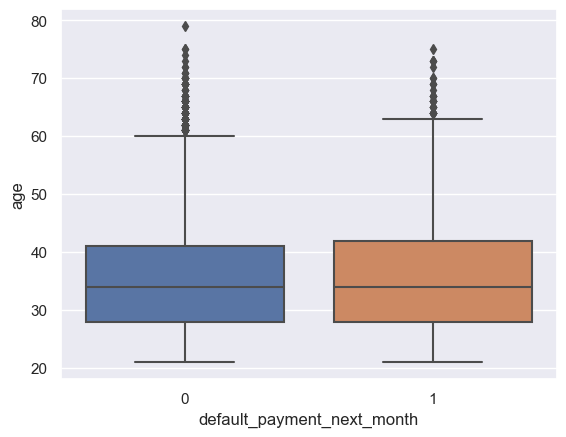

In [67]:

# observing the relationship between age and my target variable.
sns.boxplot(data = df,x='default_payment_next_month',y='age')

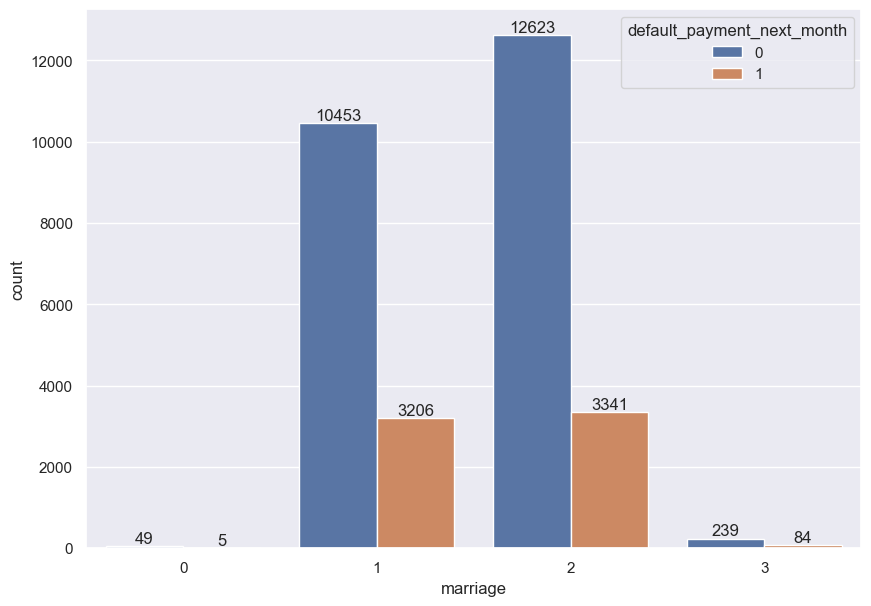

In [68]:

# observing the relationship between marriage and my target variable
plt.figure(figsize=(10,7))
marriage_target = sns.countplot(data = df,x = 'marriage',hue = 'default_payment_next_month')

# Adding a  data labels to have idea of our  target count in each feature
for p in marriage_target.patches:
    marriage_target.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )

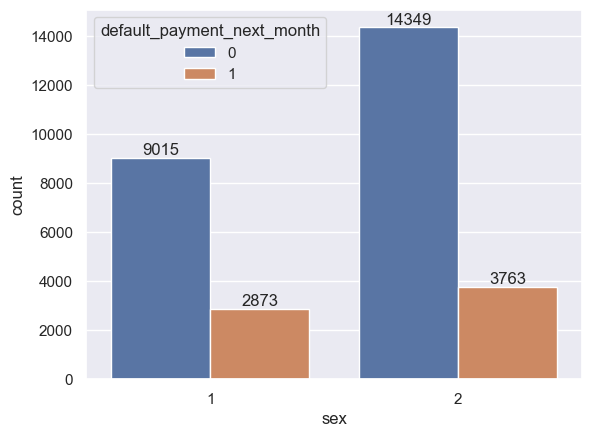

In [69]:

# observing the relationship between sex and my target variable

gender_target = sns.countplot(data = df,x = 'sex',hue = 'default_payment_next_month')

# Adding a  data labels to have idea of our  target count in each feature
for p in gender_target.patches:
    gender_target.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )

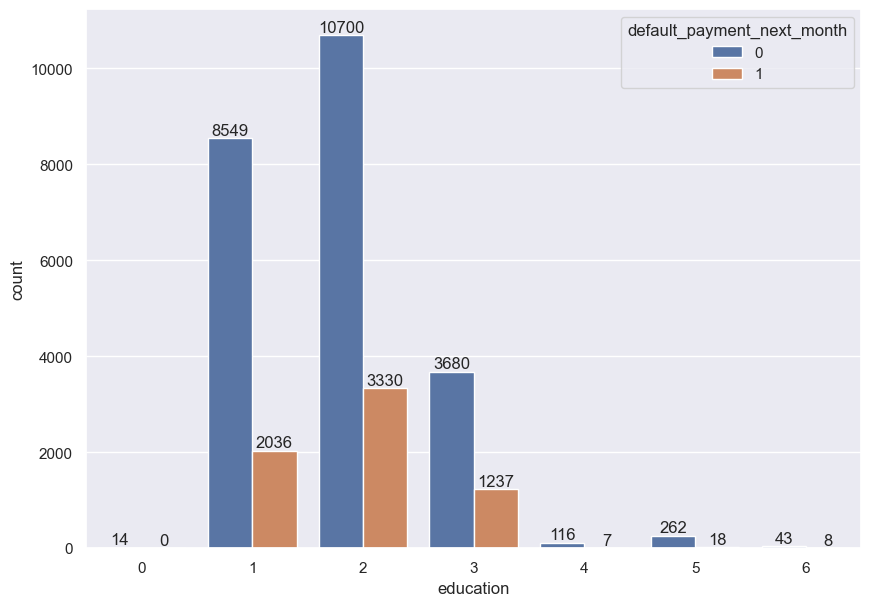

In [70]:

# observing the relationship between education and my target variable

plt.figure(figsize = (10,7))
education_target = sns.countplot(data = df,x = 'education',hue = 'default_payment_next_month')

# Adding a  data labels to have idea of our  target count in each feature
for p in education_target.patches:
    education_target.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )

<Axes: xlabel='default_payment_next_month', ylabel='limit_bal'>

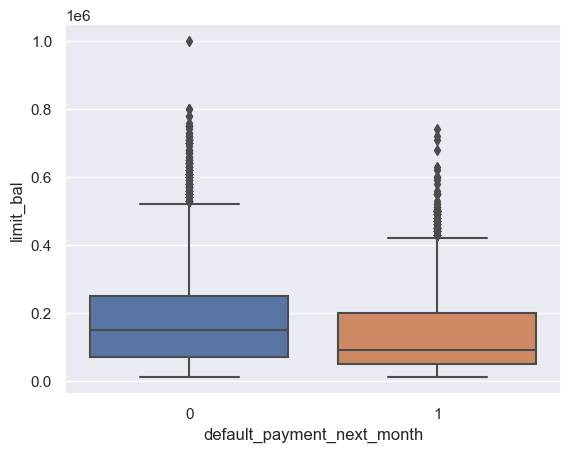

In [71]:
# Observing the relationship between limit_bal and the target variable.

sns.boxplot(data = df,x='default_payment_next_month',y='limit_bal')

In [72]:
## checking correlation between my features and target 
correlation = df.corr()
correlation

,default_payment_next_month,id,limit_bal,sex,education,marriage,age,sept_repayment,aug_repayment,july_repayment,june_repayment,may_repayment,april_repayment,sept_billAmt,aug_billAmt,july_billAmt,june_billAmt,may_billAmt,april_billAmt,sept_AmtPaid,aug_AmtPaid,july_AmtPaid,june_AmtPaid,may_AmtPaid,april_AmtPaid
default_payment_next_month,1.000000,-0.013952,-0.153520,-0.039961,0.028006,-0.024339,0.013890,0.324794,0.263551,0.235253,0.216614,0.204149,0.186866,-0.019644,-0.014193,-0.014076,-0.010156,-0.006760,-0.005372,-0.072929,-0.058579,-0.056250,-0.056827,-0.055124,-0.053183
id,-0.013952,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000
limit_bal,-0.153520,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
sex,-0.039961,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766
education,0.028006,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200
marriage,-0.024339,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641
age,0.013890,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
sept_repayment,0.324794,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
aug_repayment,0.263551,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
july_repayment,0.235253,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861


<Axes: >

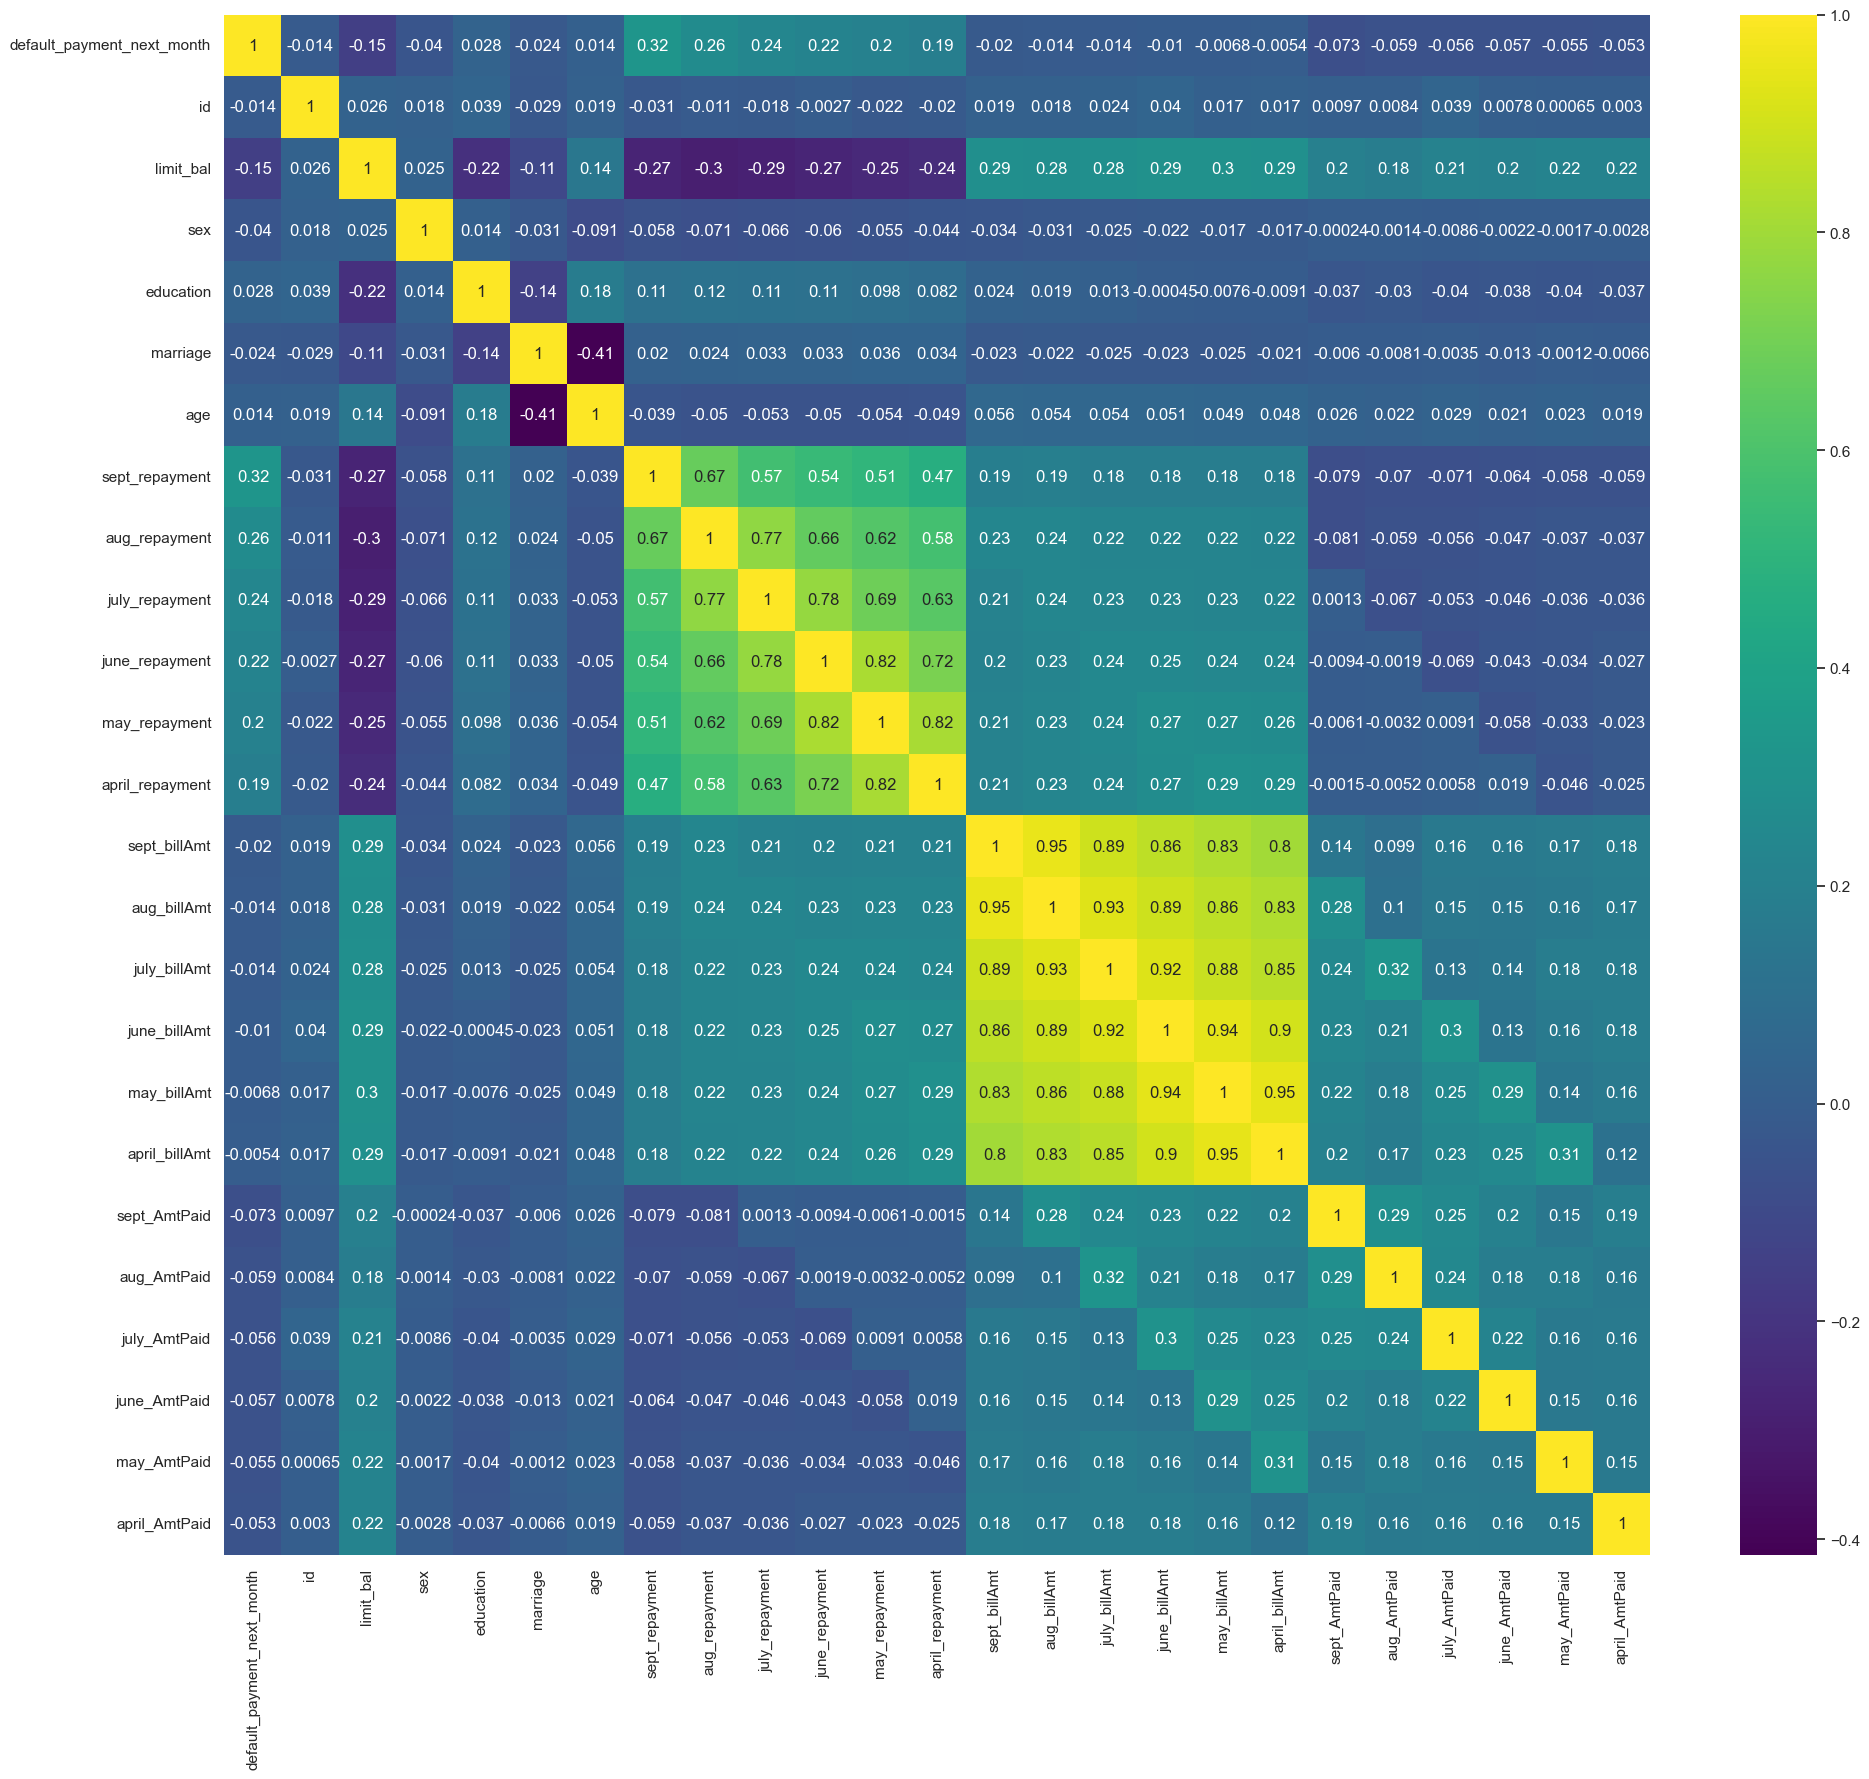

In [73]:
plt.figure(figsize=(23,20))

sns.heatmap(correlation,annot = True,cmap= 'viridis')

#####  it's evident most of my features aint correlated with  the target variable which might be a problem in getting a good model with a good cross value score. i would have to do some feature extraction later on. 

<Axes: >

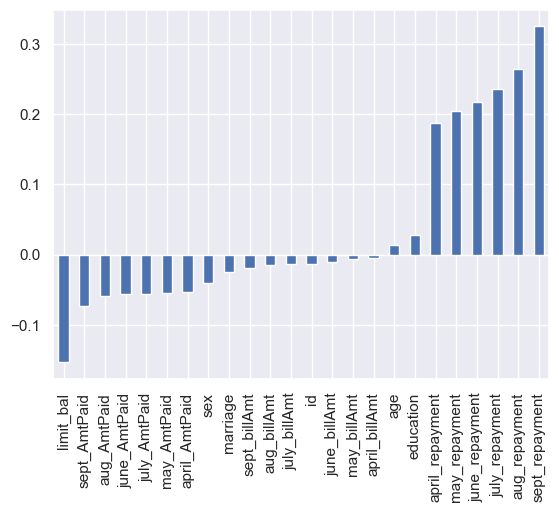

In [74]:
# Using bar plot to further visualize the correlated features 

df.corr()['default_payment_next_month'].sort_values().drop('default_payment_next_month').plot(kind ='bar')

# Section 2: Data preprocessing

In [75]:
len(df)

30000

In [76]:
df.shape

(30000, 25)

In [77]:
df.drop('id', axis=1, inplace=True)

In [78]:
df.head()

,default_payment_next_month,limit_bal,sex,education,marriage,age,sept_repayment,aug_repayment,july_repayment,june_repayment,may_repayment,april_repayment,sept_billAmt,aug_billAmt,july_billAmt,june_billAmt,may_billAmt,april_billAmt,sept_AmtPaid,aug_AmtPaid,july_AmtPaid,june_AmtPaid,may_AmtPaid,april_AmtPaid
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,0,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [79]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default_payment_next_month,30000.0,0.221200,0.415062,0.0,0.00,0.0,0.00,1.0
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
sex,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
education,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
marriage,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
sept_repayment,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
aug_repayment,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
july_repayment,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
june_repayment,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default_payment_next_month  30000 non-null  int64
 1   limit_bal                   30000 non-null  int64
 2   sex                         30000 non-null  int64
 3   education                   30000 non-null  int64
 4   marriage                    30000 non-null  int64
 5   age                         30000 non-null  int64
 6   sept_repayment              30000 non-null  int64
 7   aug_repayment               30000 non-null  int64
 8   july_repayment              30000 non-null  int64
 9   june_repayment              30000 non-null  int64
 10  may_repayment               30000 non-null  int64
 11  april_repayment             30000 non-null  int64
 12  sept_billAmt                30000 non-null  int64
 13  aug_billAmt                 30000 non-null  int64
 14  july_b

In [81]:
df.isnull().sum()

default_payment_next_month    0
limit_bal                     0
sex                           0
education                     0
marriage                      0
age                           0
sept_repayment                0
aug_repayment                 0
july_repayment                0
june_repayment                0
may_repayment                 0
april_repayment               0
sept_billAmt                  0
aug_billAmt                   0
july_billAmt                  0
june_billAmt                  0
may_billAmt                   0
april_billAmt                 0
sept_AmtPaid                  0
aug_AmtPaid                   0
july_AmtPaid                  0
june_AmtPaid                  0
may_AmtPaid                   0
april_AmtPaid                 0
dtype: int64

In [82]:
df.duplicated().sum()

35

In [83]:
df.drop_duplicates(inplace=True)

In [84]:
df.reset_index(drop=True, inplace=True)

In [85]:
len(df)

29965

### outlier checks

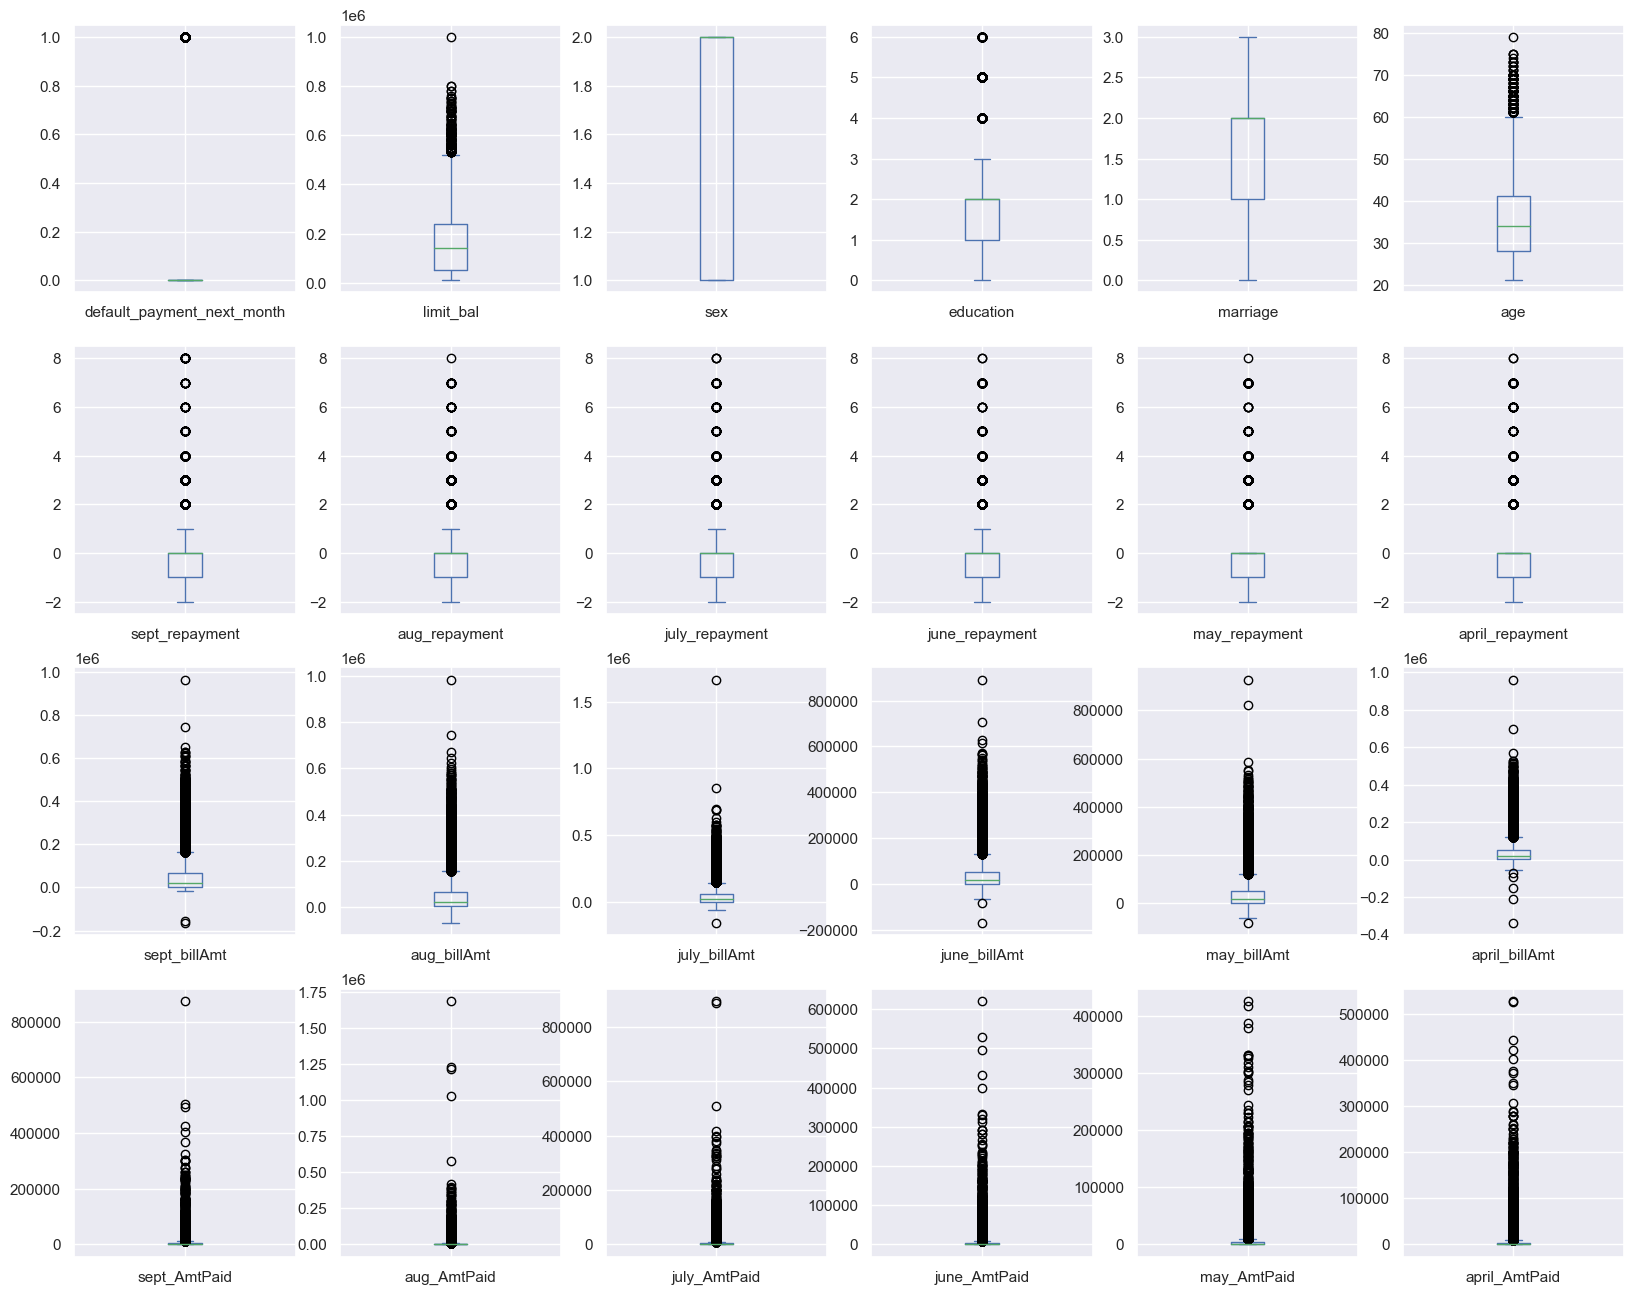

In [86]:
df.plot(
     kind = 'box',
    subplots = True,
    figsize =(20,16),
    layout = (4,6) 
);
   

### it is evident we have outliers. However, based on real life scenerio and we want the model to work for all customers, we will not remove outliers. Note that if we are to predict a continous variable, we must handle the outliers effectively. 

# WEEK 2 & 3: Data Preprocessing cont'd and Model Creation

In [90]:
X = df.drop(['default_payment_next_month'],axis = 1)
y = df['default_payment_next_month']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Normalizing the data with  minmax scaler 
 
 -- MinMax scaler bound  data into 0 and 1. 

In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [93]:
x_train_scaled= scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

## Balancing the  Target ( class 1, class 0)

In [94]:
# Creating a custom balancing techniques for different approaches to see which works best.

from imblearn.under_sampling import TomekLinks,NearMiss
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.combine import SMOTETomek

def sampler_function(data_x, data_y, sampler = 0, random_state = 42):
    
    if sampler == 0:
        sampler = RandomOverSampler(random_state = random_state)
    elif sampler == 1:
        sampler = TomekLinks()
    elif sampler == 2:
        sampler = SMOTE()
    elif sampler == 3:
        sampler = SMOTETomek()
    else: 
        sampler = NearMiss()
    X_transformed, y_transformed = sampler.fit_resample(data_x, data_y)
    
    print('Original dataset shape:', data_y.shape)
    print('Resample dataset shape:', y_transformed.shape)
    
    return X_transformed, y_transformed

In [105]:
X_train_res, y_train_res = sampler_function(x_train_scaled, y_train,sampler =3)

Original dataset shape: (20975,)
Resample dataset shape: (31606,)


# Model Creation

In [110]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(x_train_scaled, y_train)

y_pred_rfc = rfc.predict(x_test_scaled)

print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6978
           1       0.67      0.36      0.47      2012

    accuracy                           0.82      8990
   macro avg       0.76      0.65      0.68      8990
weighted avg       0.80      0.82      0.80      8990



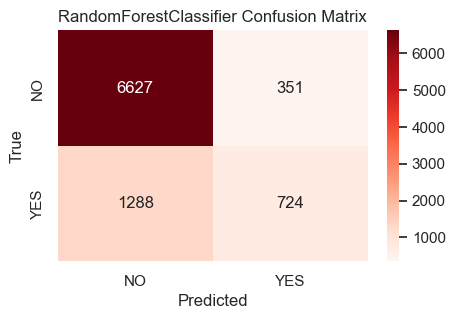

In [111]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_rfc)

cm = confusion_matrix(y_test, y_pred_rfc)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('RandomForestClassifier Confusion Matrix')
plt.show()

In [ ]:
# Hyper tuning
